# Pipeline - Titanic

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.neural_network import MLPClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

import matplotlib.pyplot as plt

import pickle

In [2]:
df = pd.read_csv("titanic-clean.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [11]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [12]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [13]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

## Train/Test Split

In [3]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((704, 6), (177, 6))

## Pipeline

In [4]:
class Debug(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        print("**** DEBUG FITTING ****")
        print(X)
        return self

    def transform(self, X):
        print("**** DEBUG TRANSFORMING ****")
        print(X)
        return X
        

In [5]:
nn_params = {"hidden_layer_sizes": (10, 10, ),
             "max_iter": 1000,
             "verbose": True,
             "solver": "adam",
             "n_iter_no_change": 100,
             "early_stopping": True}

columns_to_scale = ["Pclass", "Sex", "Age", "SibSp", "Parch"]
columns_to_encode = ["Embarked"]

transformer = ColumnTransformer(transformers=[("scaler",
                                               StandardScaler(),
                                               columns_to_scale),
                                              ("encoder",
                                               OneHotEncoder(sparse_output=False),
                                               columns_to_encode)],
                               remainder="passthrough")

# to get the output of ColumnTransformer in pandas DataFrame
transformer.set_output(transform="pandas")

pipe = Pipeline(steps=[("transformer", transformer),
                       # ("debug", Debug()),
                       ("model", MLPClassifier(**nn_params))])
pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Parch']),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Embarked'])])),
                ('model',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10),
                               max_iter=1000, n_iter_no_change=100,
                               verbose=True))])

In [6]:
pipe.fit(X_train, y_train)

Iteration 1, loss = 0.65295655
Validation score: 0.676056
Iteration 2, loss = 0.64764954
Validation score: 0.676056
Iteration 3, loss = 0.64279888
Validation score: 0.676056
Iteration 4, loss = 0.63776366
Validation score: 0.676056
Iteration 5, loss = 0.63293275
Validation score: 0.676056
Iteration 6, loss = 0.62812228
Validation score: 0.676056
Iteration 7, loss = 0.62331811
Validation score: 0.676056
Iteration 8, loss = 0.61839739
Validation score: 0.676056
Iteration 9, loss = 0.61342019
Validation score: 0.661972
Iteration 10, loss = 0.60846732
Validation score: 0.661972
Iteration 11, loss = 0.60342604
Validation score: 0.633803
Iteration 12, loss = 0.59819628
Validation score: 0.647887
Iteration 13, loss = 0.59324656
Validation score: 0.661972
Iteration 14, loss = 0.58802759
Validation score: 0.661972
Iteration 15, loss = 0.58271850
Validation score: 0.661972
Iteration 16, loss = 0.57740583
Validation score: 0.661972
Iteration 17, loss = 0.57198484
Validation score: 0.661972
Iterat

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Parch']),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Embarked'])])),
                ('model',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10),
                               max_iter=1000, n_iter_no_change=100,
                               verbose=True))])

In [7]:
pipe.score(X_test, y_test)

0.7853107344632768

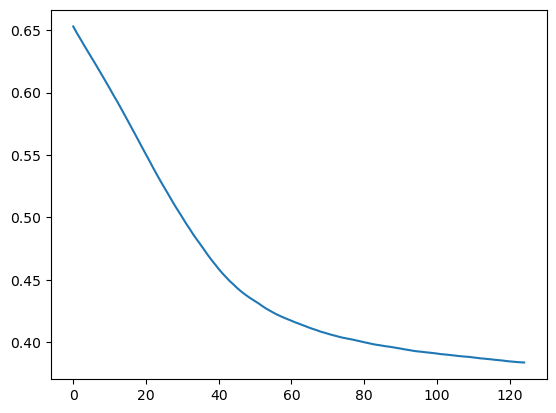

In [8]:
loss_curve = pipe["model"].loss_curve_
plt.plot(loss_curve)
plt.show()

In [9]:
pipe.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0], dtype=int64)

In [10]:
pickle.dump(pipe, open("titanic-pipe.pkl", "wb"))